<a href="https://colab.research.google.com/github/Nishajha2/Hotel-Booking-Analysis-Capstone-Project-1/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

#Below Data Set are a EDA(Exploratory data analysis) from Bookings& cancellations perspectives among both the hotels so that one can easily understand and compare what are the shortcomings faced by two of the hotels. what are the updates or changes they can make to improve performance of bookings parameters.

  Different Parameters where need to give attention are:

  1. What is total number of canceled Bookings by hotel type?
  2.  What is the booking ratio between Resort Hotel and City Hotel?
  3. What is total number of Cancellations through market segments?
  4. What is total number of Bookings through different Distribution Channels?
  


  

In [1]:
#!Importing different packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#Mounting files from content drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Reading data csv files
dataset= pd.read_csv("/content/drive/MyDrive/Copy of Hotel Bookings.csv")

In [4]:
## Display the dataset
dataset

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [5]:
# show top 2 rows
dataset.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [6]:
#Display Columns
dataset.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
#Reading info about the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
# checking null values from dataset 
dataset.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

 As we can see there are some columns contains null values but the columns required for bookings operations are fully non null values.So,After reading all Qs.now extracting out columns neccesary for answering the question in order to get proper insights.

---




In [9]:
#Extracing required columns with non null values
Column_required=dataset[["hotel","is_canceled","market_segment","distribution_channel"]]

In [10]:
Column_required

,hotel,is_canceled,market_segment,distribution_channel
0,Resort Hotel,0,Direct,Direct
1,Resort Hotel,0,Direct,Direct
2,Resort Hotel,0,Direct,Direct
3,Resort Hotel,0,Corporate,Corporate
4,Resort Hotel,0,Online TA,TA/TO
...,...,...,...,...
119385,City Hotel,0,Offline TA/TO,TA/TO
119386,City Hotel,0,Online TA,TA/TO
119387,City Hotel,0,Online TA,TA/TO
119388,City Hotel,0,Online TA,TA/TO


In [11]:
Column_required.shape

(119390, 4)

  1. What is total number of canceled Bookings by hotel type?


In [12]:
dataset['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [13]:
dataset['is_canceled'].unique()

array([0, 1])

In [14]:
 # here we grouping the columns for required data
 Canceled_df= Column_required.groupby(['hotel', 'is_canceled',])['is_canceled'].count().unstack()


Here, is_canceled have two unique values:1 for bookings canceled and 0 for bookings.


In [15]:
Canceled_df

is_canceled,0,1
hotel,,
City Hotel,46228,33102
Resort Hotel,28938,11122



Now, We will plot this data to view the daigram.

Text(0, 0.5, 'Bookings and canceled values')

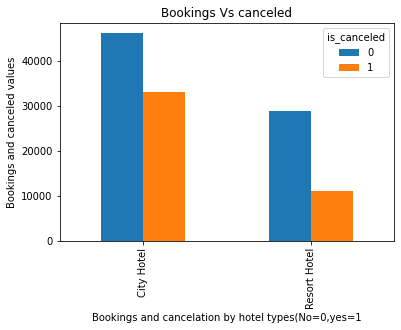

In [16]:
# creating the plot object
Canceled_df.plot(kind = 'bar')
plt.title('Bookings Vs canceled')
plt.xlabel('Bookings and cancelation by hotel types(No=0,yes=1')
plt.ylabel('Bookings and canceled values')

From, the result We can conclude here number of Bookings and cancellations are more in city hotel than resort hotel.

2.What is the booking ratio between Resort Hotel and City Hotel?

In [17]:
#extracting the bookings numbers from  Column_required
Booking_df = Column_required[Column_required['is_canceled'] == 0]
Booking_df

,hotel,is_canceled,market_segment,distribution_channel
0,Resort Hotel,0,Direct,Direct
1,Resort Hotel,0,Direct,Direct
2,Resort Hotel,0,Direct,Direct
3,Resort Hotel,0,Corporate,Corporate
4,Resort Hotel,0,Online TA,TA/TO
...,...,...,...,...
119385,City Hotel,0,Offline TA/TO,TA/TO
119386,City Hotel,0,Online TA,TA/TO
119387,City Hotel,0,Online TA,TA/TO
119388,City Hotel,0,Online TA,TA/TO


In [18]:
# x,y = get_count(Booking_df['hotel'])
z = Booking_df['hotel'].value_counts()
x = z.index
y = z/z.sum()*100

In [19]:
x.values

array(['City Hotel', 'Resort Hotel'], dtype=object)

In [20]:
y.values

array([61.50121065, 38.49878935])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


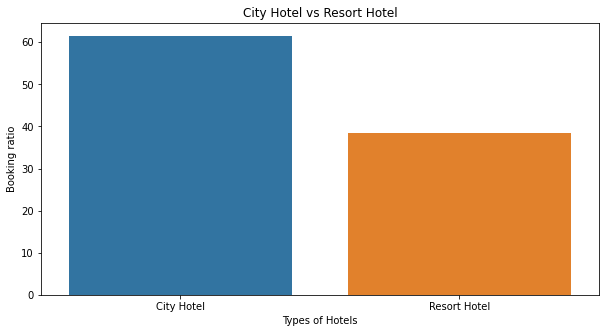

In [21]:
# Here, we Visualizing the results of x and y by using bar plot
plt.figure(figsize=(10,5))
sns.barplot(x.values,y.values)
plt.xlabel('Types of Hotels')
plt.ylabel('Booking ratio')
plt.title('City Hotel vs Resort Hotel')
plt.show()

As a result we can see more than 60% of the people booked from the City Hotel compared to Resort Hotel.